Here we are going to do some analysis with the [Consumer Price Index dataset](https://www150.statcan.gc.ca/t1/tbl1/en/tv.action?pid=1810000201&cubeTimeFrame.startMonth=01&cubeTimeFrame.startYear=2012&cubeTimeFrame.endMonth=12&cubeTimeFrame.endYear=2021&referencePeriods=20120101%2C20211201) that involves monthly average retail prices for food and essentials from 2012 to 2021.


We will perform the following steps:
* [Data Preprocessing](#Data-Preprocessing)
* [Data Analysis](#Data-Analysis)
* [Visualization](#Visualization)


### Data Preprocessing
Let's do some data preprocessing first

In [32]:
import pandas as pd

# Import dataset
raw_df = pd.read_table("data/consumer_price_index.csv", header = None)
# raw_df = pd.read_csv("data/consumer_price_index.csv", on_bad_lines='skip')
raw_df

,0
0,Monthly average retail prices for food and oth...
1,Frequency: Monthly
2,Table: 18-10-0002-01 (formerly CANSIM 326-0012)
3,Release date: 2022-03-16
4,Geography: Canada
...,...
68,"3,""Effective May 2018 reference month for the ..."
69,"4,""Beginning May 4, 2022, national average pri..."
70,"5,""Average prices are derived for products as ..."
71,How to cite: Statistics Canada. Table 18-10-00...


In [33]:
# Convert the dataset into a list
dataset_list = list(raw_df[0])
dataset_list

['Monthly average retail prices for food and other selected products 1 2 3 4',
 'Frequency:\xa0Monthly',
 'Table: 18-10-0002-01 (formerly CANSIM\xa0326-0012)',
 'Release date: 2022-03-16',
 'Geography: Canada',
 nan,
 nan,
 'Geography,"Canada",,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,',
 'Products 5,"January 2012","February 2012","March 2012","April 2012","May 2012","June 2012","July 2012","August 2012","September 2012","October 2012","November 2012","December 2012","January 2013","February 2013","March 2013","April 2013","May 2013","June 2013","July 2013","August 2013","September 2013","October 2013","November 2013","December 2013","January 2014","February 2014","March 2014","April 2014","May 2014","June 2014","July 2014","August 2014","September 2014","October 2014","November 2014","December 2014","January 2015","February 2015","March 2015","April 2015","May 2015","June 2015","July 2015","August 2015","Septe

In [34]:
# Remove the first few lines
del dataset_list[:8]
dataset_list

['Products 5,"January 2012","February 2012","March 2012","April 2012","May 2012","June 2012","July 2012","August 2012","September 2012","October 2012","November 2012","December 2012","January 2013","February 2013","March 2013","April 2013","May 2013","June 2013","July 2013","August 2013","September 2013","October 2013","November 2013","December 2013","January 2014","February 2014","March 2014","April 2014","May 2014","June 2014","July 2014","August 2014","September 2014","October 2014","November 2014","December 2014","January 2015","February 2015","March 2015","April 2015","May 2015","June 2015","July 2015","August 2015","September 2015","October 2015","November 2015","December 2015","January 2016","February 2016","March 2016","April 2016","May 2016","June 2016","July 2016","August 2016","September 2016","October 2016","November 2016","December 2016","January 2017","February 2017","March 2017","April 2017","May 2017","June 2017","July 2017","August 2017","September 2017","October 2017"

In [35]:
# Split each line by comma + double quotes
raw_df = [line.split(',"') for line in dataset_list]

# Convert to dataframe
df = pd.DataFrame(raw_df)
df = df.apply(lambda col: col.str.replace('"', ''))
df

,0,1,2,3,4,5,6,7,8,9,...,111,112,113,114,115,116,117,118,119,120
0,Products 5,January 2012,February 2012,March 2012,April 2012,May 2012,June 2012,July 2012,August 2012,September 2012,...,March 2021,April 2021,May 2021,June 2021,July 2021,August 2021,September 2021,October 2021,November 2021,December 2021
1,,"Dollars,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,...",None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2,"Round steak, 1 kilogram",13.90,13.91,14.10,14.11,14.32,14.09,14.18,14.31,14.20,...,17.97,17.94,18.53,18.71,19.05,19.23,20.01,20.34,19.77,19.66
3,"Sirloin steak, 1 kilogram",17.22,17.17,17.43,17.67,17.23,17.13,17.31,17.76,17.52,...,23.03,23.60,23.38,24.34,25.22,25.33,24.98,26.45,25.69,25.94
4,"Prime rib roast, 1 kilogram",23.14,22.41,23.57,21.51,23.82,23.98,23.96,23.74,24.36,...,36.66,36.08,38.60,39.80,41.39,39.26,43.02,43.35,44.82,42.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,3,Effective May 2018 reference month for the Con...,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
61,4,"Beginning May 4, 2022, national average prices...",None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
62,5,Average prices are derived for products as def...,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
63,How to cite: Statistics Canada. Table 18-10-00...,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [36]:
df.iloc[[53]]

,0,1,2,3,4,5,6,7,8,9,...,111,112,113,114,115,116,117,118,119,120
53,,"Cents per litre,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,...",None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [37]:
# Drop unwanted rows 
df.drop(df.index[53:], inplace=True)
df

,0,1,2,3,4,5,6,7,8,9,...,111,112,113,114,115,116,117,118,119,120
0,Products 5,January 2012,February 2012,March 2012,April 2012,May 2012,June 2012,July 2012,August 2012,September 2012,...,March 2021,April 2021,May 2021,June 2021,July 2021,August 2021,September 2021,October 2021,November 2021,December 2021
1,,"Dollars,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,...",None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2,"Round steak, 1 kilogram",13.90,13.91,14.10,14.11,14.32,14.09,14.18,14.31,14.20,...,17.97,17.94,18.53,18.71,19.05,19.23,20.01,20.34,19.77,19.66
3,"Sirloin steak, 1 kilogram",17.22,17.17,17.43,17.67,17.23,17.13,17.31,17.76,17.52,...,23.03,23.60,23.38,24.34,25.22,25.33,24.98,26.45,25.69,25.94
4,"Prime rib roast, 1 kilogram",23.14,22.41,23.57,21.51,23.82,23.98,23.96,23.74,24.36,...,36.66,36.08,38.60,39.80,41.39,39.26,43.02,43.35,44.82,42.30
5,"Blade roast, 1 kilogram",11.00,11.29,11.26,11.29,11.16,11.20,11.36,11.34,11.19,...,15.49,17.07,17.62,17.96,17.98,18.20,19.83,18.52,19.46,18.04
6,"Stewing beef, 1 kilogram",10.65,10.75,11.05,11.13,11.34,11.33,11.34,11.35,11.00,...,15.40,15.88,16.96,17.26,17.41,17.54,18.56,18.67,19.17,18.55
7,"Ground beef, 1 kilogram",8.85,8.92,8.82,8.88,9.02,9.24,9.18,9.10,9.02,...,11.22,11.53,11.28,11.00,11.31,11.56,11.86,12.31,12.46,12.06
8,"Pork chops, 1 kilogram",10.09,10.46,10.54,10.91,10.70,10.37,10.65,10.81,10.53,...,11.48,11.80,11.60,12.09,12.22,12.53,12.42,12.43,11.97,12.75
9,"Chicken, 1 kilogram",7.09,6.92,6.92,7.07,7.05,7.04,7.09,6.90,6.95,...,7.73,7.87,7.76,7.72,8.07,8.13,8.30,8.51,8.18,7.87


In [38]:
# Let's drop Homogenized milk, Partly skimmed as there's some missing values
df.drop(df.index[13:15], inplace=True)
df

,0,1,2,3,4,5,6,7,8,9,...,111,112,113,114,115,116,117,118,119,120
0,Products 5,January 2012,February 2012,March 2012,April 2012,May 2012,June 2012,July 2012,August 2012,September 2012,...,March 2021,April 2021,May 2021,June 2021,July 2021,August 2021,September 2021,October 2021,November 2021,December 2021
1,,"Dollars,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,...",None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2,"Round steak, 1 kilogram",13.90,13.91,14.10,14.11,14.32,14.09,14.18,14.31,14.20,...,17.97,17.94,18.53,18.71,19.05,19.23,20.01,20.34,19.77,19.66
3,"Sirloin steak, 1 kilogram",17.22,17.17,17.43,17.67,17.23,17.13,17.31,17.76,17.52,...,23.03,23.60,23.38,24.34,25.22,25.33,24.98,26.45,25.69,25.94
4,"Prime rib roast, 1 kilogram",23.14,22.41,23.57,21.51,23.82,23.98,23.96,23.74,24.36,...,36.66,36.08,38.60,39.80,41.39,39.26,43.02,43.35,44.82,42.30
5,"Blade roast, 1 kilogram",11.00,11.29,11.26,11.29,11.16,11.20,11.36,11.34,11.19,...,15.49,17.07,17.62,17.96,17.98,18.20,19.83,18.52,19.46,18.04
6,"Stewing beef, 1 kilogram",10.65,10.75,11.05,11.13,11.34,11.33,11.34,11.35,11.00,...,15.40,15.88,16.96,17.26,17.41,17.54,18.56,18.67,19.17,18.55
7,"Ground beef, 1 kilogram",8.85,8.92,8.82,8.88,9.02,9.24,9.18,9.10,9.02,...,11.22,11.53,11.28,11.00,11.31,11.56,11.86,12.31,12.46,12.06
8,"Pork chops, 1 kilogram",10.09,10.46,10.54,10.91,10.70,10.37,10.65,10.81,10.53,...,11.48,11.80,11.60,12.09,12.22,12.53,12.42,12.43,11.97,12.75
9,"Chicken, 1 kilogram",7.09,6.92,6.92,7.07,7.05,7.04,7.09,6.90,6.95,...,7.73,7.87,7.76,7.72,8.07,8.13,8.30,8.51,8.18,7.87


In [39]:
# Drop the "Dollars" row
df.drop([1], inplace=True)

# Reset index
df = df.reset_index(drop=True)
df

,0,1,2,3,4,5,6,7,8,9,...,111,112,113,114,115,116,117,118,119,120
0,Products 5,January 2012,February 2012,March 2012,April 2012,May 2012,June 2012,July 2012,August 2012,September 2012,...,March 2021,April 2021,May 2021,June 2021,July 2021,August 2021,September 2021,October 2021,November 2021,December 2021
1,"Round steak, 1 kilogram",13.90,13.91,14.10,14.11,14.32,14.09,14.18,14.31,14.20,...,17.97,17.94,18.53,18.71,19.05,19.23,20.01,20.34,19.77,19.66
2,"Sirloin steak, 1 kilogram",17.22,17.17,17.43,17.67,17.23,17.13,17.31,17.76,17.52,...,23.03,23.60,23.38,24.34,25.22,25.33,24.98,26.45,25.69,25.94
3,"Prime rib roast, 1 kilogram",23.14,22.41,23.57,21.51,23.82,23.98,23.96,23.74,24.36,...,36.66,36.08,38.60,39.80,41.39,39.26,43.02,43.35,44.82,42.30
4,"Blade roast, 1 kilogram",11.00,11.29,11.26,11.29,11.16,11.20,11.36,11.34,11.19,...,15.49,17.07,17.62,17.96,17.98,18.20,19.83,18.52,19.46,18.04
5,"Stewing beef, 1 kilogram",10.65,10.75,11.05,11.13,11.34,11.33,11.34,11.35,11.00,...,15.40,15.88,16.96,17.26,17.41,17.54,18.56,18.67,19.17,18.55
6,"Ground beef, 1 kilogram",8.85,8.92,8.82,8.88,9.02,9.24,9.18,9.10,9.02,...,11.22,11.53,11.28,11.00,11.31,11.56,11.86,12.31,12.46,12.06
7,"Pork chops, 1 kilogram",10.09,10.46,10.54,10.91,10.70,10.37,10.65,10.81,10.53,...,11.48,11.80,11.60,12.09,12.22,12.53,12.42,12.43,11.97,12.75
8,"Chicken, 1 kilogram",7.09,6.92,6.92,7.07,7.05,7.04,7.09,6.90,6.95,...,7.73,7.87,7.76,7.72,8.07,8.13,8.30,8.51,8.18,7.87
9,"Bacon, 500 grams",5.01,5.20,5.12,5.13,5.13,5.08,5.15,5.14,5.18,...,7.29,7.69,7.89,7.79,7.99,8.24,8.27,8.29,8.47,8.66


In [40]:
df[0].iloc[0]="Products"
df

,0,1,2,3,4,5,6,7,8,9,...,111,112,113,114,115,116,117,118,119,120
0,Products,January 2012,February 2012,March 2012,April 2012,May 2012,June 2012,July 2012,August 2012,September 2012,...,March 2021,April 2021,May 2021,June 2021,July 2021,August 2021,September 2021,October 2021,November 2021,December 2021
1,"Round steak, 1 kilogram",13.90,13.91,14.10,14.11,14.32,14.09,14.18,14.31,14.20,...,17.97,17.94,18.53,18.71,19.05,19.23,20.01,20.34,19.77,19.66
2,"Sirloin steak, 1 kilogram",17.22,17.17,17.43,17.67,17.23,17.13,17.31,17.76,17.52,...,23.03,23.60,23.38,24.34,25.22,25.33,24.98,26.45,25.69,25.94
3,"Prime rib roast, 1 kilogram",23.14,22.41,23.57,21.51,23.82,23.98,23.96,23.74,24.36,...,36.66,36.08,38.60,39.80,41.39,39.26,43.02,43.35,44.82,42.30
4,"Blade roast, 1 kilogram",11.00,11.29,11.26,11.29,11.16,11.20,11.36,11.34,11.19,...,15.49,17.07,17.62,17.96,17.98,18.20,19.83,18.52,19.46,18.04
5,"Stewing beef, 1 kilogram",10.65,10.75,11.05,11.13,11.34,11.33,11.34,11.35,11.00,...,15.40,15.88,16.96,17.26,17.41,17.54,18.56,18.67,19.17,18.55
6,"Ground beef, 1 kilogram",8.85,8.92,8.82,8.88,9.02,9.24,9.18,9.10,9.02,...,11.22,11.53,11.28,11.00,11.31,11.56,11.86,12.31,12.46,12.06
7,"Pork chops, 1 kilogram",10.09,10.46,10.54,10.91,10.70,10.37,10.65,10.81,10.53,...,11.48,11.80,11.60,12.09,12.22,12.53,12.42,12.43,11.97,12.75
8,"Chicken, 1 kilogram",7.09,6.92,6.92,7.07,7.05,7.04,7.09,6.90,6.95,...,7.73,7.87,7.76,7.72,8.07,8.13,8.30,8.51,8.18,7.87
9,"Bacon, 500 grams",5.01,5.20,5.12,5.13,5.13,5.08,5.15,5.14,5.18,...,7.29,7.69,7.89,7.79,7.99,8.24,8.27,8.29,8.47,8.66


In [41]:
# Grab the first row as the header
df.columns = df.iloc[0]

# Take the data less the header row
df = df[1:]

df.reset_index(drop=True, inplace=True)
df

,Products,January 2012,February 2012,March 2012,April 2012,May 2012,June 2012,July 2012,August 2012,September 2012,...,March 2021,April 2021,May 2021,June 2021,July 2021,August 2021,September 2021,October 2021,November 2021,December 2021
0,"Round steak, 1 kilogram",13.90,13.91,14.10,14.11,14.32,14.09,14.18,14.31,14.20,...,17.97,17.94,18.53,18.71,19.05,19.23,20.01,20.34,19.77,19.66
1,"Sirloin steak, 1 kilogram",17.22,17.17,17.43,17.67,17.23,17.13,17.31,17.76,17.52,...,23.03,23.60,23.38,24.34,25.22,25.33,24.98,26.45,25.69,25.94
2,"Prime rib roast, 1 kilogram",23.14,22.41,23.57,21.51,23.82,23.98,23.96,23.74,24.36,...,36.66,36.08,38.60,39.80,41.39,39.26,43.02,43.35,44.82,42.30
3,"Blade roast, 1 kilogram",11.00,11.29,11.26,11.29,11.16,11.20,11.36,11.34,11.19,...,15.49,17.07,17.62,17.96,17.98,18.20,19.83,18.52,19.46,18.04
4,"Stewing beef, 1 kilogram",10.65,10.75,11.05,11.13,11.34,11.33,11.34,11.35,11.00,...,15.40,15.88,16.96,17.26,17.41,17.54,18.56,18.67,19.17,18.55
5,"Ground beef, 1 kilogram",8.85,8.92,8.82,8.88,9.02,9.24,9.18,9.10,9.02,...,11.22,11.53,11.28,11.00,11.31,11.56,11.86,12.31,12.46,12.06
6,"Pork chops, 1 kilogram",10.09,10.46,10.54,10.91,10.70,10.37,10.65,10.81,10.53,...,11.48,11.80,11.60,12.09,12.22,12.53,12.42,12.43,11.97,12.75
7,"Chicken, 1 kilogram",7.09,6.92,6.92,7.07,7.05,7.04,7.09,6.90,6.95,...,7.73,7.87,7.76,7.72,8.07,8.13,8.30,8.51,8.18,7.87
8,"Bacon, 500 grams",5.01,5.20,5.12,5.13,5.13,5.08,5.15,5.14,5.18,...,7.29,7.69,7.89,7.79,7.99,8.24,8.27,8.29,8.47,8.66
9,"Wieners, 450 grams",3.45,3.47,3.53,3.63,3.53,3.47,3.46,3.45,3.37,...,4.73,4.89,4.86,4.89,4.86,4.96,5.11,5.42,5.30,5.43


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Columns: 121 entries, Products to December 2021
dtypes: object(121)
memory usage: 46.4+ KB


In [43]:
products = df['Products']

df = df.drop(['Products'], axis=1)

# Convert entire dataframe values to float
df = df.apply(pd.to_numeric, errors='coerce') 
#‘coerce’ -> invalid parsing will be set as NaN

df.insert(loc=0, column='Products', value=products)

df

,Products,January 2012,February 2012,March 2012,April 2012,May 2012,June 2012,July 2012,August 2012,September 2012,...,March 2021,April 2021,May 2021,June 2021,July 2021,August 2021,September 2021,October 2021,November 2021,December 2021
0,"Round steak, 1 kilogram",13.90,13.91,14.10,14.11,14.32,14.09,14.18,14.31,14.20,...,17.97,17.94,18.53,18.71,19.05,19.23,20.01,20.34,19.77,19.66
1,"Sirloin steak, 1 kilogram",17.22,17.17,17.43,17.67,17.23,17.13,17.31,17.76,17.52,...,23.03,23.60,23.38,24.34,25.22,25.33,24.98,26.45,25.69,25.94
2,"Prime rib roast, 1 kilogram",23.14,22.41,23.57,21.51,23.82,23.98,23.96,23.74,24.36,...,36.66,36.08,38.60,39.80,41.39,39.26,43.02,43.35,44.82,42.30
3,"Blade roast, 1 kilogram",11.00,11.29,11.26,11.29,11.16,11.20,11.36,11.34,11.19,...,15.49,17.07,17.62,17.96,17.98,18.20,19.83,18.52,19.46,18.04
4,"Stewing beef, 1 kilogram",10.65,10.75,11.05,11.13,11.34,11.33,11.34,11.35,11.00,...,15.40,15.88,16.96,17.26,17.41,17.54,18.56,18.67,19.17,18.55
5,"Ground beef, 1 kilogram",8.85,8.92,8.82,8.88,9.02,9.24,9.18,9.10,9.02,...,11.22,11.53,11.28,11.00,11.31,11.56,11.86,12.31,12.46,12.06
6,"Pork chops, 1 kilogram",10.09,10.46,10.54,10.91,10.70,10.37,10.65,10.81,10.53,...,11.48,11.80,11.60,12.09,12.22,12.53,12.42,12.43,11.97,12.75
7,"Chicken, 1 kilogram",7.09,6.92,6.92,7.07,7.05,7.04,7.09,6.90,6.95,...,7.73,7.87,7.76,7.72,8.07,8.13,8.30,8.51,8.18,7.87
8,"Bacon, 500 grams",5.01,5.20,5.12,5.13,5.13,5.08,5.15,5.14,5.18,...,7.29,7.69,7.89,7.79,7.99,8.24,8.27,8.29,8.47,8.66
9,"Wieners, 450 grams",3.45,3.47,3.53,3.63,3.53,3.47,3.46,3.45,3.37,...,4.73,4.89,4.86,4.89,4.86,4.96,5.11,5.42,5.30,5.43


In [44]:
import numpy as np

# Check if there's any missing(nan) values
np.where(pd.isnull(df))

(array([], dtype=int64), array([], dtype=int64))

### Data Analysis
Now we're pretty much all set. Let's get some insights from the dataset
#### 1. Calculate the CPI (Consumer price index)
Formula:

CPI_t = (C_t/C_0)*100

CPI_t = consumer price index in current period

C_t	= cost of market basket in current period

C_0	= cost of market basket in base period

##### (1). First we need to find total expenditure by multiplying "price times quantity" and "adding them", our steps:
a. Get the mean of total expenditure in 2012 by
use numpy do the add and divide

In [45]:
'''
Or using numpy, for example:
import numpy as np
df['2012'] = np.sum(df[['January 2012', 'February 2012']], axis=1)
'''

year_2012 = df.columns[1:13]
year_2021 = df.columns[110:]

# Add new columns
# df['2012'] = df[year_2012].sum(axis=1).div(12)
# df.insert(loc=1, column='2012 average price', value=average_price_2012)
# df.insert(loc=2, column='2021 average price', value=average_price_2021)
# df


# sum the price, divide by 12 months and only get 2 decimal places
average_price_2012 = round(df[year_2012].sum(axis=1).div(12), 2)
average_price_2021 = round(df[year_2021].sum(axis=1).div(12), 2)


 
# Create a new DataFrame
data = {'2012 average price': average_price_2012.tolist(),
        '2021 average price': average_price_2021.tolist()}

price_by_year_df = pd.DataFrame(data)
price_by_year_df['Products'] = df['Products'].tolist()
price_by_year_df = price_by_year_df.set_index('Products')

price_by_year_df

,2012 average price,2021 average price
Products,,
"Round steak, 1 kilogram",14.13,17.42
"Sirloin steak, 1 kilogram",17.29,22.53
"Prime rib roast, 1 kilogram",23.40,36.80
"Blade roast, 1 kilogram",11.29,16.44
"Stewing beef, 1 kilogram",11.05,15.94
"Ground beef, 1 kilogram",9.06,10.64
"Pork chops, 1 kilogram",10.61,11.07
"Chicken, 1 kilogram",6.99,7.26
"Bacon, 500 grams",5.13,7.34


In [46]:
total = price_by_year_df.sum()
price_by_year_df.loc['Total'] = total
price_by_year_df

,2012 average price,2021 average price
Products,,
"Round steak, 1 kilogram",14.13,17.42
"Sirloin steak, 1 kilogram",17.29,22.53
"Prime rib roast, 1 kilogram",23.40,36.80
"Blade roast, 1 kilogram",11.29,16.44
"Stewing beef, 1 kilogram",11.05,15.94
"Ground beef, 1 kilogram",9.06,10.64
"Pork chops, 1 kilogram",10.61,11.07
"Chicken, 1 kilogram",6.99,7.26
"Bacon, 500 grams",5.13,7.34


In [47]:
# Find the CPI in 2012: (expenditure_mean_2012/expenditure_mean_2012)*100
expenditure_2012 = price_by_year_df['2012 average price']['Total']
CPI_2012 = (expenditure_2012/expenditure_2012)*100
CPI_2012

100.0

In [48]:
# Find the CPI in 2021: (expenditure_mean_2021/expenditure_mean_2012)*100
expenditure_2021 = price_by_year_df['2021 average price']['Total']
CPI_2021 = (expenditure_2021/expenditure_2012)*100
CPI_2021

127.15929701669899

#### 2. Calculate the inflation rate between 2012 and 2021

(Formula: inflation rate = Current CPI - Previous CPI/Previous CPI x 100)
 
CPI = (Cost of Market Basket in Given Year/Cost of Market Basket in Base Year) * 100

In [49]:
inflation_rate = round((CPI_2021-CPI_2012)/100*100, 2)
print(f"Inflation rate: {inflation_rate}%")

Inflation rate: 27.16%


### Visualization
1. price trend graph by products 
2. price trend graph overall

In [50]:
df

,Products,January 2012,February 2012,March 2012,April 2012,May 2012,June 2012,July 2012,August 2012,September 2012,...,March 2021,April 2021,May 2021,June 2021,July 2021,August 2021,September 2021,October 2021,November 2021,December 2021
0,"Round steak, 1 kilogram",13.90,13.91,14.10,14.11,14.32,14.09,14.18,14.31,14.20,...,17.97,17.94,18.53,18.71,19.05,19.23,20.01,20.34,19.77,19.66
1,"Sirloin steak, 1 kilogram",17.22,17.17,17.43,17.67,17.23,17.13,17.31,17.76,17.52,...,23.03,23.60,23.38,24.34,25.22,25.33,24.98,26.45,25.69,25.94
2,"Prime rib roast, 1 kilogram",23.14,22.41,23.57,21.51,23.82,23.98,23.96,23.74,24.36,...,36.66,36.08,38.60,39.80,41.39,39.26,43.02,43.35,44.82,42.30
3,"Blade roast, 1 kilogram",11.00,11.29,11.26,11.29,11.16,11.20,11.36,11.34,11.19,...,15.49,17.07,17.62,17.96,17.98,18.20,19.83,18.52,19.46,18.04
4,"Stewing beef, 1 kilogram",10.65,10.75,11.05,11.13,11.34,11.33,11.34,11.35,11.00,...,15.40,15.88,16.96,17.26,17.41,17.54,18.56,18.67,19.17,18.55
5,"Ground beef, 1 kilogram",8.85,8.92,8.82,8.88,9.02,9.24,9.18,9.10,9.02,...,11.22,11.53,11.28,11.00,11.31,11.56,11.86,12.31,12.46,12.06
6,"Pork chops, 1 kilogram",10.09,10.46,10.54,10.91,10.70,10.37,10.65,10.81,10.53,...,11.48,11.80,11.60,12.09,12.22,12.53,12.42,12.43,11.97,12.75
7,"Chicken, 1 kilogram",7.09,6.92,6.92,7.07,7.05,7.04,7.09,6.90,6.95,...,7.73,7.87,7.76,7.72,8.07,8.13,8.30,8.51,8.18,7.87
8,"Bacon, 500 grams",5.01,5.20,5.12,5.13,5.13,5.08,5.15,5.14,5.18,...,7.29,7.69,7.89,7.79,7.99,8.24,8.27,8.29,8.47,8.66
9,"Wieners, 450 grams",3.45,3.47,3.53,3.63,3.53,3.47,3.46,3.45,3.37,...,4.73,4.89,4.86,4.89,4.86,4.96,5.11,5.42,5.30,5.43


In [51]:
df = df.set_index('Products')
df

,January 2012,February 2012,March 2012,April 2012,May 2012,June 2012,July 2012,August 2012,September 2012,October 2012,...,March 2021,April 2021,May 2021,June 2021,July 2021,August 2021,September 2021,October 2021,November 2021,December 2021
Products,,,,,,,,,,,,,,,,,,,,,
"Round steak, 1 kilogram",13.90,13.91,14.10,14.11,14.32,14.09,14.18,14.31,14.20,14.21,...,17.97,17.94,18.53,18.71,19.05,19.23,20.01,20.34,19.77,19.66
"Sirloin steak, 1 kilogram",17.22,17.17,17.43,17.67,17.23,17.13,17.31,17.76,17.52,17.39,...,23.03,23.60,23.38,24.34,25.22,25.33,24.98,26.45,25.69,25.94
"Prime rib roast, 1 kilogram",23.14,22.41,23.57,21.51,23.82,23.98,23.96,23.74,24.36,22.45,...,36.66,36.08,38.60,39.80,41.39,39.26,43.02,43.35,44.82,42.30
"Blade roast, 1 kilogram",11.00,11.29,11.26,11.29,11.16,11.20,11.36,11.34,11.19,11.31,...,15.49,17.07,17.62,17.96,17.98,18.20,19.83,18.52,19.46,18.04
"Stewing beef, 1 kilogram",10.65,10.75,11.05,11.13,11.34,11.33,11.34,11.35,11.00,11.08,...,15.40,15.88,16.96,17.26,17.41,17.54,18.56,18.67,19.17,18.55
"Ground beef, 1 kilogram",8.85,8.92,8.82,8.88,9.02,9.24,9.18,9.10,9.02,9.10,...,11.22,11.53,11.28,11.00,11.31,11.56,11.86,12.31,12.46,12.06
"Pork chops, 1 kilogram",10.09,10.46,10.54,10.91,10.70,10.37,10.65,10.81,10.53,10.81,...,11.48,11.80,11.60,12.09,12.22,12.53,12.42,12.43,11.97,12.75
"Chicken, 1 kilogram",7.09,6.92,6.92,7.07,7.05,7.04,7.09,6.90,6.95,7.07,...,7.73,7.87,7.76,7.72,8.07,8.13,8.30,8.51,8.18,7.87
"Bacon, 500 grams",5.01,5.20,5.12,5.13,5.13,5.08,5.15,5.14,5.18,5.17,...,7.29,7.69,7.89,7.79,7.99,8.24,8.27,8.29,8.47,8.66


In [52]:
# Let's reshape the dataset
df_new = df.copy()
df_new = df_new.transpose() 
df_new

Products,"Round steak, 1 kilogram","Sirloin steak, 1 kilogram","Prime rib roast, 1 kilogram","Blade roast, 1 kilogram","Stewing beef, 1 kilogram","Ground beef, 1 kilogram","Pork chops, 1 kilogram","Chicken, 1 kilogram","Bacon, 500 grams","Wieners, 450 grams",...,"Soup, canned, 284 millilitres","Baby food, 128 millilitres","Peanut butter, 500 grams",Paper towels (2 rolls),Facial tissue (200 tissues),Bathroom tissue (4 rolls),"Shampoo, 300 millilitres","Deodorant, 60 grams","Toothpaste, 100 millilitres",Cigarettes (200)
0,,,,,,,,,,,,,,,,,,,,,
January 2012,13.90,17.22,23.14,11.00,10.65,8.85,10.09,7.09,5.01,3.45,...,1.00,0.84,3.15,2.58,2.31,2.52,4.04,4.63,2.45,84.06
February 2012,13.91,17.17,22.41,11.29,10.75,8.92,10.46,6.92,5.20,3.47,...,1.01,0.84,3.60,2.59,2.28,2.54,4.04,4.47,2.40,84.13
March 2012,14.10,17.43,23.57,11.26,11.05,8.82,10.54,6.92,5.12,3.53,...,1.02,0.83,3.84,2.58,2.24,2.50,3.97,4.43,2.41,84.83
April 2012,14.11,17.67,21.51,11.29,11.13,8.88,10.91,7.07,5.13,3.63,...,1.02,0.84,3.79,2.62,2.26,2.60,3.91,4.38,2.42,84.72
May 2012,14.32,17.23,23.82,11.16,11.34,9.02,10.70,7.05,5.13,3.53,...,1.04,0.85,3.87,2.53,2.24,2.60,3.95,4.54,2.44,84.78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
August 2021,19.23,25.33,39.26,18.20,17.54,11.56,12.53,8.13,8.24,4.96,...,1.25,1.62,2.84,3.21,2.84,2.91,4.19,4.37,3.43,140.09
September 2021,20.01,24.98,43.02,19.83,18.56,11.86,12.42,8.30,8.27,5.11,...,1.24,1.68,2.82,3.29,2.88,2.90,4.10,4.35,3.45,140.40
October 2021,20.34,26.45,43.35,18.52,18.67,12.31,12.43,8.51,8.29,5.42,...,1.29,1.66,2.78,3.31,2.81,2.95,4.08,4.32,3.49,140.99


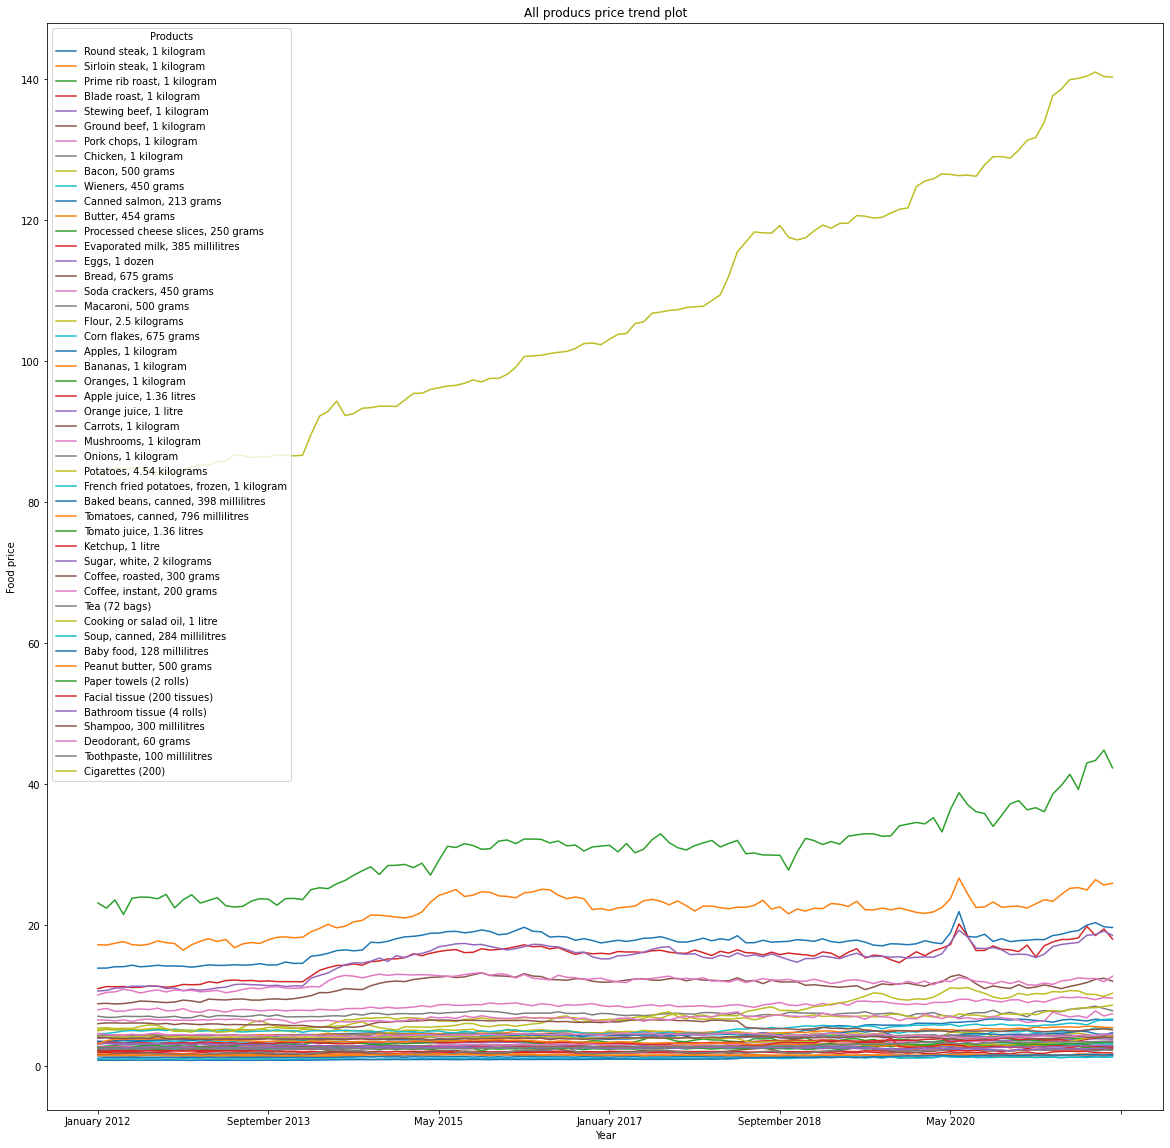

In [53]:
import matplotlib.pyplot as plt
# With a DataFrame, pandas creates by default one line plot for each of the columns with numeric data.
df_new.plot(figsize=(20, 20))
plt.xlabel("Year")
plt.ylabel("Food price")
plt.title("All producs price trend plot")
plt.show()

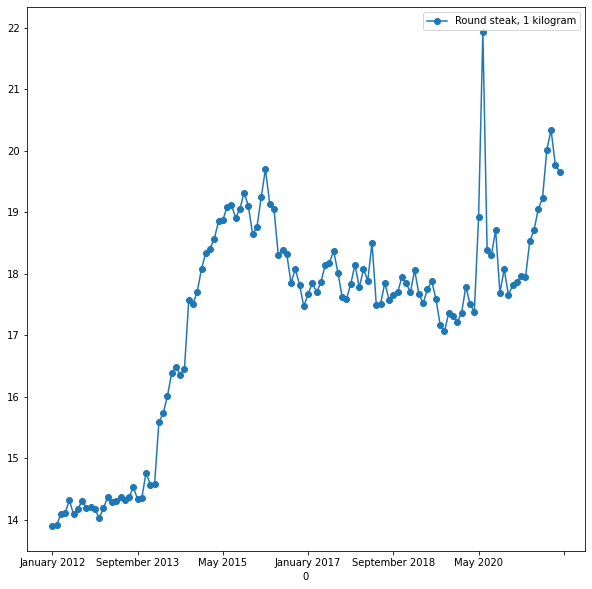

In [54]:
# Only plot the given column
df_new["Round steak, 1 kilogram"].plot(figsize=(10, 10), marker="o")
plt.legend()

<AxesSubplot:xlabel='0'>

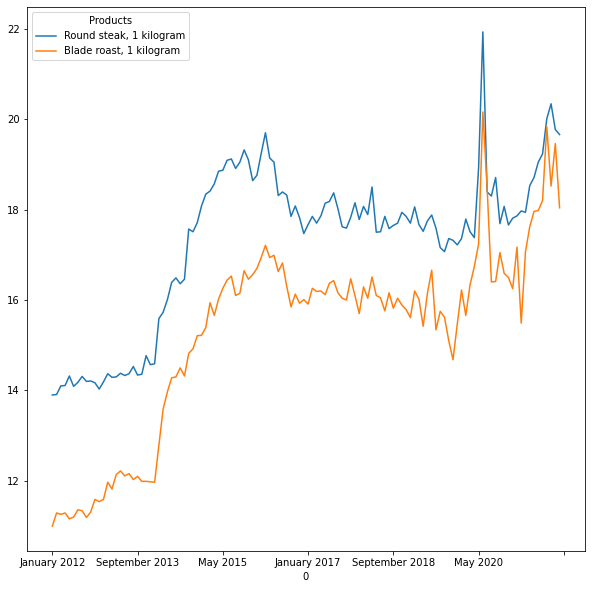

In [55]:
df_new[["Round steak, 1 kilogram", "Blade roast, 1 kilogram"]].plot(figsize=(10, 10))
